In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://api.db.nomics.world/v22/series/AMECO/UDGG.csv?dimensions=%7B%22freq%22%3A%5B%22a%22%5D%2C%22unit%22%3A%5B%22percentage-of-gdp-at-current-prices-excessive-deficit-procedure%22%5D%2C%22geo%22%3A%5B%22deu%22%2C%22ita%22%2C%22fra%22%2C%22esp%22%5D%7D&limit=1000"

df_debt = pd.read_csv(url)

df_debt.head(10)

,period,Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Germany (AMECO/UDGG/DEU.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Spain (AMECO/UDGG/ESP.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – France (AMECO/UDGG/FRA.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Italy (AMECO/UDGG/ITA.1.0.319.0.UDGG)
0,1960,NaN,NaN,NaN,31.7953
1,1961,NaN,NaN,NaN,29.9336
2,1962,NaN,NaN,NaN,28.7905
3,1963,NaN,NaN,NaN,26.8476
4,1964,NaN,NaN,NaN,26.6785
5,1965,NaN,NaN,NaN,27.7109
6,1966,NaN,NaN,NaN,32.3737
7,1967,NaN,NaN,NaN,31.9473
8,1968,NaN,NaN,NaN,34.3091
9,1969,NaN,NaN,NaN,34.9216


In [3]:
df_debt.to_csv('data/df_debt.csv', sep = ",", index = False)

In [4]:
df_debt.dtypes

period                                                                                                                        int64
Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Germany (AMECO/UDGG/DEU.1.0.319.0.UDGG)    float64
Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Spain (AMECO/UDGG/ESP.1.0.319.0.UDGG)      float64
Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – France (AMECO/UDGG/FRA.1.0.319.0.UDGG)     float64
Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Italy (AMECO/UDGG/ITA.1.0.319.0.UDGG)      float64
dtype: object

In [5]:
new_names = {df_debt.columns[0]: "Year",
             df_debt.columns[1]: "Germany",
             df_debt.columns[2]: "Spain",
             df_debt.columns[3]: "France",
             df_debt.columns[4]: "Italy",}

df_debt.rename(columns = new_names, inplace = True)

In [6]:
df_debt.head()

,Year,Germany,Spain,France,Italy
0,1960,NaN,NaN,NaN,31.7953
1,1961,NaN,NaN,NaN,29.9336
2,1962,NaN,NaN,NaN,28.7905
3,1963,NaN,NaN,NaN,26.8476
4,1964,NaN,NaN,NaN,26.6785


In [7]:
df_debt.isnull().sum()

Year        0
Germany    35
Spain      35
France     35
Italy       0
dtype: int64

In [8]:
df_debt.dropna(inplace = True)
df_debt.reset_index(drop=True, inplace = True)
df_debt.head()

,Year,Germany,Spain,France,Italy
0,1995,54.9024,61.5424,57.5929,119.3622
1,1996,57.7939,65.4076,60.3374,119.1093
2,1997,58.8666,64.2495,61.8342,116.7821
3,1998,59.5347,62.3060,61.8435,114.1269
4,1999,60.3874,60.8039,61.1666,113.2895


In [10]:
df_debt.to_csv('data/df_debt.csv', sep = ",", index = False)

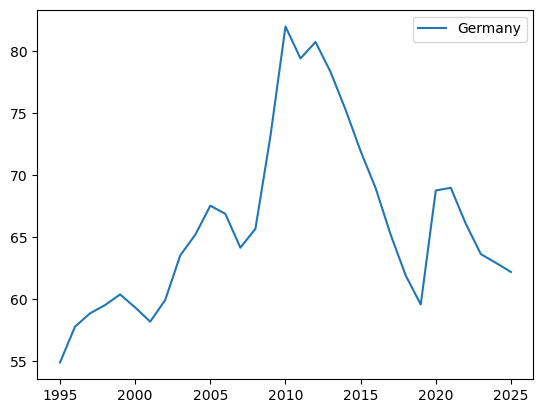

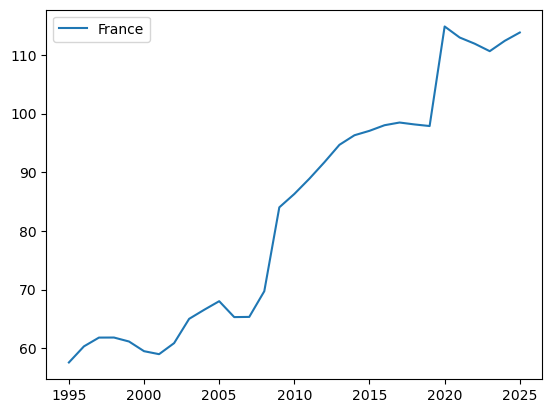

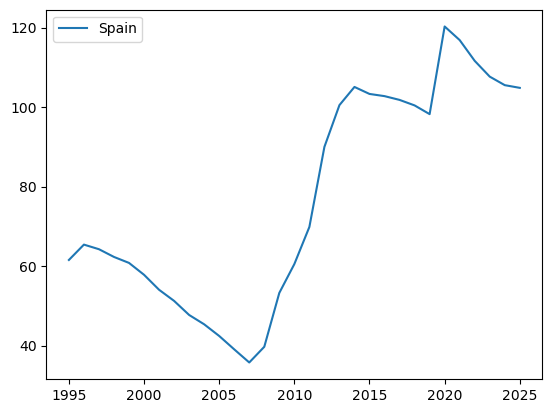

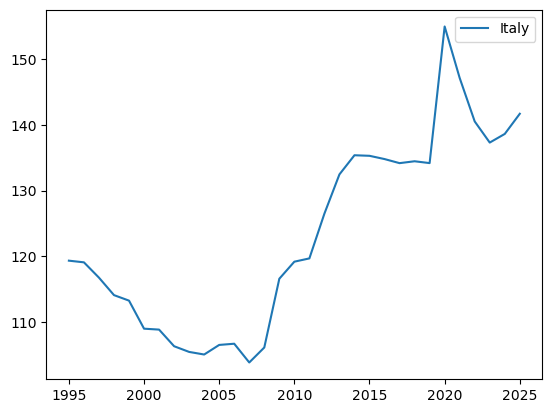

In [13]:
x = df_debt['Year']

countries = ['Germany', 'France', 'Spain', 'Italy']

for country in countries:
    plt.plot(x, df_debt[country], label = country)
    
    plt.legend()
    plt.show()

# From wide to long

In [17]:
df_debt_long = pd.melt(
    df_debt,
    id_vars = 'Year',
    var_name = 'Country',
    value_name = 'Debt ratio'
)

df_debt_long

,Year,Country,Debt ratio
0,1995,Germany,54.9024
1,1996,Germany,57.7939
2,1997,Germany,58.8666
3,1998,Germany,59.5347
4,1999,Germany,60.3874
...,...,...,...
119,2021,Italy,147.1270
120,2022,Italy,140.5217
121,2023,Italy,137.3104
122,2024,Italy,138.6244


<Axes: xlabel='Year', ylabel='Debt ratio'>

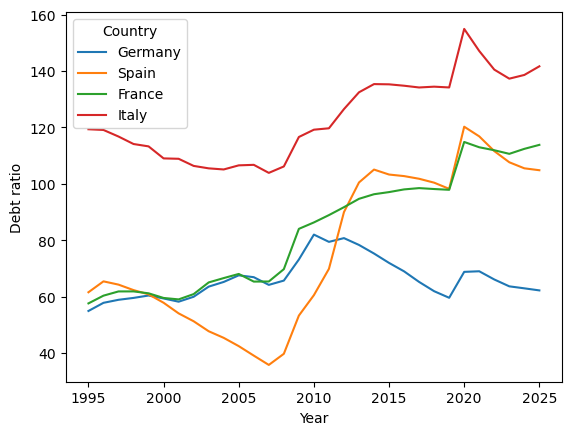

In [21]:
sns.lineplot(x = 'Year',
            y = 'Debt ratio',
            hue = 'Country',
            data = df_debt_long)

# From long to wide

In [25]:
df_debt_wide = pd.pivot(
    df_debt_long,
    index = 'Year',
    columns = 'Country',
    values = 'Debt ratio'
).reset_index()

In [26]:
df_debt_wide


Country,Year,France,Germany,Italy,Spain
0,1995,57.5929,54.9024,119.3622,61.5424
1,1996,60.3374,57.7939,119.1093,65.4076
2,1997,61.8342,58.8666,116.7821,64.2495
3,1998,61.8435,59.5347,114.1269,62.3060
4,1999,61.1666,60.3874,113.2895,60.8039
5,2000,59.5167,59.3398,109.0258,57.8153
6,2001,59.0088,58.1930,108.8863,54.0495
7,2002,60.8896,59.9458,106.3605,51.2499
8,2003,65.0290,63.5383,105.4946,47.7117
9,2004,66.5689,65.2009,105.1009,45.3655


In [27]:
df_debt_long.to_csv('data/df_debt_long', sep = ",", index = False)